In [1]:
import re
import numpy as np
import pandas as pd
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.decomposition import PCA
from sklearn.decomposition import SparsePCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import BernoulliNB,GaussianNB
from imblearn.over_sampling import SMOTE
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import TruncatedSVD
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,f1_score,make_scorer
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest
from sklearn.impute import SimpleImputer
from sklearn.model_selection import ShuffleSplit,cross_val_score

In [2]:
bank_data = pd.read_csv("/content/drive/MyDrive/bank-additional-full.csv", sep=';')
bank_data.info()
print(bank_data.shape)
bank_data.head(7)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
bank_data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [4]:
#!pip install pandas-profiling==3.4.0
#from pandas_profiling import ProfileReport
#profile = ProfileReport(bank_data)
#profile

In [5]:
#profile.to_file(output_file="pandas_profiling1.html")

In [6]:
y_label = bank_data['y']
final_values = {'yes':1,'no':0}
y_label = y_label.map(lambda value: final_values[value])
y_label.head(5)

0    0
1    0
2    0
3    0
4    0
Name: y, dtype: int64

In [7]:
bank_data_1 = bank_data.copy()
bank_data_1.drop(['y'],axis=1,inplace = True)
bank_data.drop(['y'],axis=1,inplace = True)
bank_data_1.drop(['default','contact','month','day_of_week','duration','pdays'],axis=1,inplace = True)
print(bank_data_1.shape)
print(bank_data.shape)

(41188, 14)
(41188, 20)


In [8]:
bank_data.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
dtype: int64

In [9]:
y_label.value_counts()

0    36548
1     4640
Name: y, dtype: int64

In [10]:
X_train, X_test, y_train, y_test = train_test_split(bank_data, y_label, test_size=0.2, random_state=0)
cv_X_train, cv_X_test, cv_y_train, cv_y_test = train_test_split(X_train, y_train, test_size=0.2)
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(bank_data_1, y_label, test_size=0.2, random_state=0)
cv_X_train_1, cv_X_test_1, cv_y_train_1, cv_y_test_1 = train_test_split(X_train_1, y_train_1, test_size=0.2)

In [11]:
X_train.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
29321,40,services,divorced,high.school,no,yes,no,telephone,apr,fri,501,3,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1
23925,33,unemployed,married,university.degree,no,yes,no,cellular,aug,fri,59,2,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1
39148,31,admin.,divorced,professional.course,no,yes,no,cellular,mar,tue,292,2,999,1,failure,-1.8,93.369,-34.8,0.655,5008.7
12078,29,blue-collar,single,basic.9y,no,yes,no,telephone,jun,fri,76,1,999,0,nonexistent,1.4,94.465,-41.8,4.947,5228.1
41021,29,unemployed,single,high.school,no,yes,no,cellular,oct,fri,168,2,999,0,nonexistent,-1.1,94.601,-49.5,1.029,4963.6


In [12]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(bank_data, y_label, test_size=0.2, random_state=0)
cv_X_train1, cv_X_test1, cv_y_train1, cv_y_test1 = train_test_split(X_train1, y_train1, test_size=0.2)
X_train1_1, X_test1_1, y_train1_1, y_test_1 = train_test_split(bank_data_1, y_label, test_size=0.2, random_state=0)
cv_X_train1_1, cv_X_test1_1, cv_y_train1_1, cv_y_test_1 = train_test_split(X_train1_1, y_train1_1, test_size=0.2)

from sklearn.preprocessing import OneHotEncoder
OneHot_enc = OneHotEncoder(handle_unknown="ignore", sparse=False)
OneHot_enc_1 = OneHotEncoder(handle_unknown="ignore", sparse=False)

categorical_cols = ['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome']
categorical_cols1 = ['job','marital','education','housing','loan','poutcome']
OneHot_enc.fit(bank_data[categorical_cols])
X_train1_c = OneHot_enc.transform(X_train1[categorical_cols])
X_test1_c = OneHot_enc.transform(X_test1[categorical_cols])
cv_X_train1_c = OneHot_enc.transform(cv_X_train1[categorical_cols])
cv_X_test1_c = OneHot_enc.transform(cv_X_test1[categorical_cols]) 

OneHot_enc_1.fit(bank_data_1[categorical_cols1])
X_train1_1_c = OneHot_enc_1.transform(X_train1_1[categorical_cols1])
X_test1_1_c = OneHot_enc_1.transform(X_test1_1[categorical_cols1])
cv_X_train1_1_c = OneHot_enc_1.transform(cv_X_train1_1[categorical_cols1])
cv_X_test1_1_c = OneHot_enc_1.transform(cv_X_test1_1[categorical_cols1])


In [13]:
X_train1_cp = pd.DataFrame(X_train1_c, index=X_train1.index)
X_test1_cp = pd.DataFrame(X_test1_c, index=X_test1.index)
cv_X_train1_cp = pd.DataFrame(cv_X_train1_c, index=cv_X_train1.index)
cv_X_test1_cp = pd.DataFrame(cv_X_test1_c, index=cv_X_test1.index)

X_train1_1_cp = pd.DataFrame(X_train1_1_c, index=X_train1_1.index)
X_test1_1_cp = pd.DataFrame(X_test1_1_c, index=X_test1_1.index)
cv_X_train1_1_cp = pd.DataFrame(cv_X_train1_1_c, index=cv_X_train1_1.index)
cv_X_test1_1_cp = pd.DataFrame(cv_X_test1_1_c, index=cv_X_test1_1.index)

X_train1_ct = X_train1.drop(columns=categorical_cols)
X_test1_ct = X_test1.drop(columns=categorical_cols)
cv_X_train1_ct = cv_X_train1.drop(columns=categorical_cols)
cv_X_test1_ct = cv_X_test1.drop(columns=categorical_cols)

X_train1_1_ct = X_train1_1.drop(columns=categorical_cols1)
X_test1_1_ct = X_test1_1.drop(columns=categorical_cols1)
cv_X_train1_1_ct = cv_X_train1_1.drop(columns=categorical_cols1)
cv_X_test1_1_ct = cv_X_test1_1.drop(columns=categorical_cols1)

In [14]:
X_train1_ohe = pd.concat([X_train1_cp, X_train1_ct], axis=1)
X_test1_ohe = pd.concat([X_test1_cp, X_test1_ct], axis=1)
cv_X_train1_ohe = pd.concat([cv_X_train1_cp, cv_X_train1_ct], axis=1)
cv_X_test1_ohe = pd.concat([cv_X_test1_cp, cv_X_test1_ct], axis=1)

X_train1_1_ohe = pd.concat([X_train1_1_cp, X_train1_1_ct], axis=1)
X_test1_1_ohe = pd.concat([X_test1_1_cp, X_test1_1_ct], axis=1)
cv_X_train1_1_ohe = pd.concat([cv_X_train1_1_cp, cv_X_train1_1_ct], axis=1)
cv_X_test1_1_ohe = pd.concat([cv_X_test1_1_cp, cv_X_test1_1_ct], axis=1)

In [15]:
from sklearn.preprocessing import LabelEncoder
Label_enc = LabelEncoder()
Label_enc_1 = LabelEncoder()

#job-categoral
Label_enc.fit(bank_data['job'])
X_train.job = Label_enc.transform(X_train.job)
X_test.job = Label_enc.transform(X_test.job)
cv_X_train.job = Label_enc.transform(cv_X_train.job)
cv_X_test.job = Label_enc.transform(cv_X_test.job) 

Label_enc_1.fit(bank_data_1['job'])
X_train_1.job = Label_enc.transform(X_train_1.job)
X_test_1.job = Label_enc.transform(X_test_1.job)
cv_X_train_1.job = Label_enc.transform(cv_X_train_1.job)
cv_X_test_1.job = Label_enc.transform(cv_X_test_1.job)

#martial - categoral
Label_enc = LabelEncoder()
Label_enc_1 = LabelEncoder()
Label_enc.fit(bank_data['marital'])
X_train.marital = Label_enc.transform(X_train.marital)
X_test.marital = Label_enc.transform(X_test.marital)
cv_X_train.marital = Label_enc.transform(cv_X_train.marital)
cv_X_test.marital = Label_enc.transform(cv_X_test.marital) 

Label_enc_1.fit(bank_data_1['marital'])
X_train_1.marital = Label_enc.transform(X_train_1.marital)
X_test_1.marital = Label_enc.transform(X_test_1.marital)
cv_X_train_1.marital = Label_enc.transform(cv_X_train_1.marital)
cv_X_test_1.marital = Label_enc.transform(cv_X_test_1.marital)

#education - categoral
Label_enc = LabelEncoder()
Label_enc_1 = LabelEncoder()
Label_enc.fit(bank_data['education'])
X_train.education = Label_enc.transform(X_train.education)
X_test.education = Label_enc.transform(X_test.education)
cv_X_train.education = Label_enc.transform(cv_X_train.education)
cv_X_test.education = Label_enc.transform(cv_X_test.education) 

Label_enc_1.fit(bank_data_1['education'])
X_train_1.education = Label_enc.transform(X_train_1.education)
X_test_1.education = Label_enc.transform(X_test_1.education)
cv_X_train_1.education = Label_enc.transform(cv_X_train_1.education)
cv_X_test_1.education = Label_enc.transform(cv_X_test_1.education)

#default- categoral
Label_enc = LabelEncoder()
Label_enc_1 = LabelEncoder()
Label_enc.fit(bank_data['default'])
X_train.default = Label_enc.transform(X_train.default)
X_test.default = Label_enc.transform(X_test.default)
cv_X_train.default = Label_enc.transform(cv_X_train.default)
cv_X_test.default = Label_enc.transform(cv_X_test.default) 

#housing-categoral
Label_enc = LabelEncoder()
Label_enc_1 = LabelEncoder()
Label_enc.fit(bank_data['housing'])
X_train.housing = Label_enc.transform(X_train.housing)
X_test.housing = Label_enc.transform(X_test.housing) 
cv_X_train.housing = Label_enc.transform(cv_X_train.housing)
cv_X_test.housing = Label_enc.transform(cv_X_test.housing) 

Label_enc_1.fit(bank_data_1['housing'])
X_train_1.housing = Label_enc.transform(X_train_1.housing)
X_test_1.housing = Label_enc.transform(X_test_1.housing)
cv_X_train_1.housing = Label_enc.transform(cv_X_train_1.housing)
cv_X_test_1.housing = Label_enc.transform(cv_X_test_1.housing)

#loan-categoral
Label_enc = LabelEncoder()
Label_enc_1 = LabelEncoder()
Label_enc.fit(bank_data['loan'])
X_train.loan = Label_enc.transform(X_train.loan)
X_test.loan = Label_enc.transform(X_test.loan)
cv_X_train.loan = Label_enc.transform(cv_X_train.loan)
cv_X_test.loan = Label_enc.transform(cv_X_test.loan)  

Label_enc_1.fit(bank_data_1['loan'])
X_train_1.loan = Label_enc.transform(X_train_1.loan)
X_test_1.loan = Label_enc.transform(X_test_1.loan)
cv_X_train_1.loan = Label_enc.transform(cv_X_train_1.loan)
cv_X_test_1.loan = Label_enc.transform(cv_X_test_1.loan)

#contact-categoral
Label_enc = LabelEncoder()
Label_enc_1 = LabelEncoder()
Label_enc.fit(bank_data['contact'])
X_train.contact = Label_enc.transform(X_train.contact)
X_test.contact = Label_enc.transform(X_test.contact)
cv_X_train.contact = Label_enc.transform(cv_X_train.contact)
cv_X_test.contact = Label_enc.transform(cv_X_test.contact)

#month - categoral
Label_enc = LabelEncoder()
Label_enc_1 = LabelEncoder()
Label_enc.fit(bank_data['month'])
X_train.month = Label_enc.transform(X_train.month)
X_test.month = Label_enc.transform(X_test.month)
cv_X_train.month = Label_enc.transform(cv_X_train.month)
cv_X_test.month = Label_enc.transform(cv_X_test.month)

#day_of_week- categoral
Label_enc = LabelEncoder()
Label_enc_1 = LabelEncoder()
Label_enc.fit(bank_data['day_of_week'])
X_train.day_of_week = Label_enc.transform(X_train.day_of_week)
X_test.day_of_week = Label_enc.transform(X_test.day_of_week)
cv_X_train.day_of_week = Label_enc.transform(cv_X_train.day_of_week)
cv_X_test.day_of_week = Label_enc.transform(cv_X_test.day_of_week)

#poutcome - categoral
Label_enc = LabelEncoder()
Label_enc_1 = LabelEncoder()
Label_enc.fit(bank_data['poutcome'])
X_train.poutcome = Label_enc.transform(X_train.poutcome)
X_test.poutcome = Label_enc.transform(X_test.poutcome) 
cv_X_train.poutcome = Label_enc.transform(cv_X_train.poutcome)
cv_X_test.poutcome = Label_enc.transform(cv_X_test.poutcome) 

Label_enc_1.fit(bank_data_1['poutcome'])
X_train_1.poutcome = Label_enc.transform(X_train_1.poutcome)
X_test_1.poutcome = Label_enc.transform(X_test_1.poutcome)
cv_X_train_1.poutcome = Label_enc.transform(cv_X_train_1.poutcome)
cv_X_test_1.poutcome = Label_enc.transform(cv_X_test_1.poutcome)

In [16]:
X_train.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
29321,40,7,0,3,0,2,0,1,0,0,501,3,999,0,1,-1.8,93.075,-47.1,1.405,5099.1
23925,33,10,1,6,0,2,0,0,1,0,59,2,999,0,1,1.4,93.444,-36.1,4.963,5228.1
39148,31,0,0,5,0,2,0,0,5,3,292,2,999,1,0,-1.8,93.369,-34.8,0.655,5008.7
12078,29,1,2,2,0,2,0,1,4,0,76,1,999,0,1,1.4,94.465,-41.8,4.947,5228.1
41021,29,10,2,3,0,2,0,0,8,0,168,2,999,0,1,-1.1,94.601,-49.5,1.029,4963.6


In [17]:
X_train_1.head(5)

,age,job,marital,education,housing,loan,campaign,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
29321,40,7,0,3,2,0,3,0,1,-1.8,93.075,-47.1,1.405,5099.1
23925,33,10,1,6,2,0,2,0,1,1.4,93.444,-36.1,4.963,5228.1
39148,31,0,0,5,2,0,2,1,0,-1.8,93.369,-34.8,0.655,5008.7
12078,29,1,2,2,2,0,1,0,1,1.4,94.465,-41.8,4.947,5228.1
41021,29,10,2,3,2,0,2,0,1,-1.1,94.601,-49.5,1.029,4963.6


16


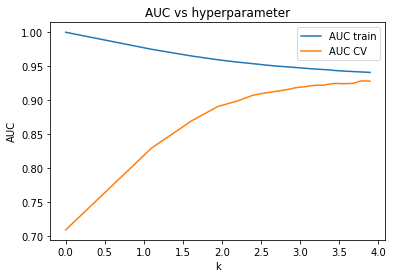

In [18]:
#K-NN - All attributes - brute force - euclidean 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score
import math
k = list(range(1,50,2))
train_auc = []
cv_auc = []
acc = []

for i in k:
  #print(i)
  k_nn = KNeighborsClassifier(n_neighbors = i,algorithm='brute',metric = 'euclidean')
  k_nn.fit(cv_X_train,cv_y_train)
  #prediction = k_nn.predict(X_test)
  #cv1 = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
  #scores = cross_val_score(k_nn, X_train, y_train, cv=cv1)
  #print ('Cross validation', scores)
  #print(classification_report(y_test,prediction))
  prob_cv = k_nn.predict_proba(cv_X_test)[:,1]
  cv_auc.append(roc_auc_score(cv_y_test,prob_cv))
  prob_train = k_nn.predict_proba(cv_X_train)[:,1]
  train_auc.append(roc_auc_score(cv_y_train,prob_train))
  score_1 = k_nn.score(cv_X_test, cv_y_test)
  acc.append(score_1)

optimal_k = k[cv_auc.index(max(cv_auc))]
k_1 = [math.log(x) for x in k]
value = int(np.argmax(acc))
print(value)

#plot auc vs alpha
x = plt.subplot( )
x.plot(k_1, train_auc, label='AUC train')
x.plot(k_1, cv_auc, label='AUC CV')
plt.title('AUC vs hyperparameter')
plt.xlabel('k')
plt.ylabel('AUC')
x.legend()
plt.show()


In [19]:
for j in range(len(acc)):
  print(j,acc[j])
print(k[value])

0 0.8878603945371776
1 0.9003034901365705
2 0.9066767830045523
3 0.9074355083459787
4 0.9071320182094081
5 0.9091047040971169
6 0.9089529590288316
7 0.9092564491654022
8 0.9092564491654022
9 0.9106221547799697
10 0.9112291350531108
11 0.9113808801213961
12 0.9122913505311078
13 0.9119878603945372
14 0.9130500758725342
15 0.9128983308042489
16 0.9147192716236723
17 0.9142640364188164
18 0.91350531107739
19 0.9130500758725342
20 0.9128983308042489
21 0.9132018209408195
22 0.9127465857359636
23 0.9130500758725342
24 0.9138088012139606
33


In [20]:
k_nn = KNeighborsClassifier(n_neighbors = k[value],algorithm='brute',metric = 'euclidean')
k_nn.fit(cv_X_train,cv_y_train)
pred_test = k_nn.predict(X_test)
print(classification_report(y_test,pred_test))

              precision    recall  f1-score   support

           0       0.94      0.97      0.95      7319
           1       0.66      0.53      0.59       919

    accuracy                           0.92      8238
   macro avg       0.80      0.75      0.77      8238
weighted avg       0.91      0.92      0.91      8238



Text(0, 0.5, 'Testing Accuracy')

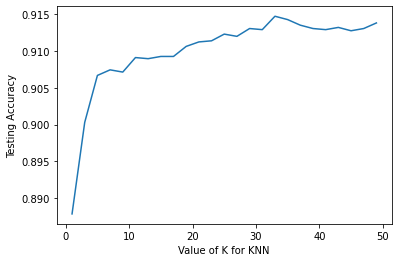

In [21]:
plt.plot(k, acc)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

24


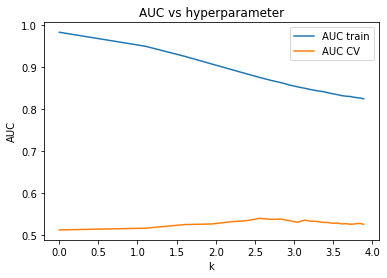

In [22]:
#K-NN-reduced attributes-brute force - euclidean
k = list(range(1,50,2))
train_auc = []
cv_auc = []
acc = []

for i in k:
  #print(i)
  k_nn = KNeighborsClassifier(n_neighbors = i,algorithm='brute',metric='euclidean')
  k_nn.fit(cv_X_train_1,cv_y_train_1)
  #prediction = k_nn.predict(X_test)
  #cv1 = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
  #scores = cross_val_score(k_nn, X_train, y_train, cv=cv1)
  #print ('Cross validation', scores)
  #print(classification_report(y_test,prediction))
  prob_cv = k_nn.predict_proba(cv_X_test_1)[:,1]
  cv_auc.append(roc_auc_score(cv_y_test_1,prob_cv))
  prob_train = k_nn.predict_proba(cv_X_train_1)[:,1]
  train_auc.append(roc_auc_score(cv_y_train_1,prob_train))
  score_1 = k_nn.score(cv_X_test_1, cv_y_test_1)
  acc.append(score_1)
optimal_k = k[cv_auc.index(max(cv_auc))]
k_1 = [math.log(x) for x in k]
value = int(np.argmax(acc))
print(value)

#plot auc vs alpha
x = plt.subplot( )
x.plot(k_1, train_auc, label='AUC train')
x.plot(k_1, cv_auc, label='AUC CV')
plt.title('AUC vs hyperparameter')
plt.xlabel('k')
plt.ylabel('AUC')
x.legend()
plt.show()


In [23]:
for j in range(len(acc)):
  print(j,acc[j])
print(k[value])

0 0.8095599393019727
1 0.843247344461305
2 0.8499241274658573
3 0.8506828528072837
4 0.8552352048558421
5 0.8559939301972685
6 0.8591805766312595
7 0.8608497723823976
8 0.8608497723823976
9 0.8629742033383915
10 0.8632776934749621
11 0.8635811836115326
12 0.864339908952959
13 0.8650986342943854
14 0.8644916540212443
15 0.8647951441578149
16 0.865402124430956
17 0.866464339908953
18 0.8667678300455235
19 0.8658573596358118
20 0.8663125948406677
21 0.8670713201820941
22 0.8663125948406677
23 0.8672230652503794
24 0.8679817905918058
49


In [24]:
k_nn = KNeighborsClassifier(n_neighbors = k[value],algorithm='brute',metric = 'euclidean')
k_nn.fit(cv_X_train_1,cv_y_train_1)
pred_test = k_nn.predict(X_test_1)
print(classification_report(y_test_1,pred_test))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94      7319
           1       0.58      0.17      0.26       919

    accuracy                           0.89      8238
   macro avg       0.74      0.58      0.60      8238
weighted avg       0.87      0.89      0.87      8238



Text(0, 0.5, 'Testing Accuracy')

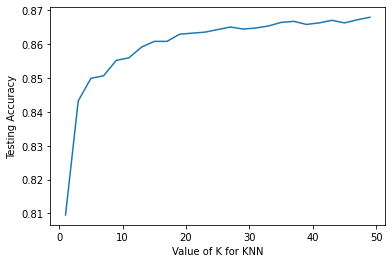

In [25]:
plt.plot(k, acc)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

24


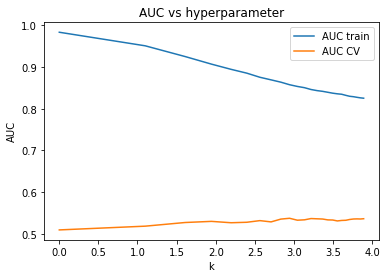

In [26]:
#K-NN-all atributes-brute force - cosine
k = list(range(1,50,2))
train_auc = []
cv_auc = []
acc = []

for i in k:
  #print(i)
  k_nn = KNeighborsClassifier(n_neighbors = i,algorithm='brute',metric = 'cosine')
  k_nn.fit(cv_X_train_1,cv_y_train_1)
  #prediction = k_nn.predict(X_test)
  #cv1 = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
  #scores = cross_val_score(k_nn, X_train, y_train, cv=cv1)
  #print ('Cross validation', scores)
  #print(classification_report(y_test,prediction))
  prob_cv = k_nn.predict_proba(cv_X_test_1)[:,1]
  cv_auc.append(roc_auc_score(cv_y_test_1,prob_cv))
  prob_train = k_nn.predict_proba(cv_X_train_1)[:,1]
  train_auc.append(roc_auc_score(cv_y_train_1,prob_train))
  score_1 = k_nn.score(cv_X_test_1, cv_y_test_1)
  acc.append(score_1)
optimal_k = k[cv_auc.index(max(cv_auc))]
k_1 = [math.log(x) for x in k]
value = int(np.argmax(acc))
print(value)


#plot auc vs alpha
x = plt.subplot( )
x.plot(k_1, train_auc, label='AUC train')
x.plot(k_1, cv_auc, label='AUC CV')
plt.title('AUC vs hyperparameter')
plt.xlabel('k')
plt.ylabel('AUC')
x.legend()
plt.show()


In [27]:
for j in range(len(acc)):
  print(j,acc[j])
print(k[value])

0 0.8098634294385433
1 0.8458270106221548
2 0.8511380880121396
3 0.8544764795144157
4 0.856752655538695
5 0.8576631259484067
6 0.8584218512898331
7 0.8597875569044006
8 0.8614567526555387
9 0.865402124430956
10 0.8652503793626707
11 0.865402124430956
12 0.8650986342943854
13 0.8669195751138088
14 0.868133535660091
15 0.8687405159332322
16 0.8693474962063733
17 0.8696509863429438
18 0.8708649468892261
19 0.8710166919575114
20 0.8717754172989378
21 0.8719271623672231
22 0.8719271623672231
23 0.8725341426403642
24 0.8726858877086495
49


In [28]:
k_nn = KNeighborsClassifier(n_neighbors = k[value],algorithm='brute',metric = 'cosine')
k_nn.fit(cv_X_train_1,cv_y_train_1)
pred_test = k_nn.predict(X_test_1)
print(classification_report(y_test_1,pred_test))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94      7319
           1       0.58      0.14      0.22       919

    accuracy                           0.89      8238
   macro avg       0.74      0.56      0.58      8238
weighted avg       0.87      0.89      0.86      8238



Text(0, 0.5, 'Testing Accuracy')

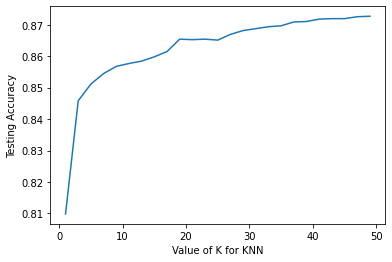

In [29]:
plt.plot(k, acc)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

21


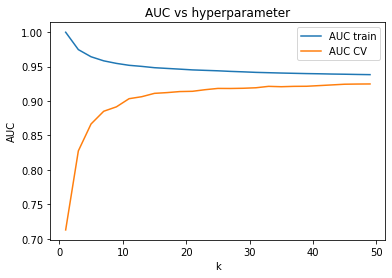

In [30]:
#K-NN-reduced atributes-brute force - cosine
k = list(range(1,50,2))
train_auc = []
cv_auc = []
acc = []

for i in k:
  #print(i)
  k_nn = KNeighborsClassifier(n_neighbors = i,algorithm='brute',metric = 'cosine')
  k_nn.fit(cv_X_train,cv_y_train)
  #prediction = k_nn.predict(X_test)
  #cv1 = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
  #scores = cross_val_score(k_nn, X_train, y_train, cv=cv1)
  #print ('Cross validation', scores)
  #print(classification_report(y_test,prediction))
  prob_cv = k_nn.predict_proba(cv_X_test)[:,1]
  cv_auc.append(roc_auc_score(cv_y_test,prob_cv))
  prob_train = k_nn.predict_proba(cv_X_train)[:,1]
  train_auc.append(roc_auc_score(cv_y_train,prob_train))
  score_1 = k_nn.score(cv_X_test, cv_y_test)
  acc.append(score_1)
optimal_k = k[cv_auc.index(max(cv_auc))]
k_1 = [math.log(x) for x in k]
value = int(np.argmax(acc))
print(value)

#plot auc vs alpha
x = plt.subplot( )
x.plot(k, train_auc, label='AUC train')
x.plot(k, cv_auc, label='AUC CV')
plt.title('AUC vs hyperparameter')
plt.xlabel('k')
plt.ylabel('AUC')
x.legend()
plt.show()


In [31]:
for j in range(len(acc)):
  print(j,acc[j])
print(k[value])

0 0.8893778452200304
1 0.9
2 0.906980273141123
3 0.907587253414264
4 0.9088012139605463
5 0.9092564491654022
6 0.9077389984825494
7 0.9089529590288316
8 0.9104704097116844
9 0.9116843702579667
10 0.9104704097116844
11 0.9115326251896814
12 0.9115326251896814
13 0.9124430955993931
14 0.9104704097116844
15 0.9100151745068286
16 0.9113808801213961
17 0.9116843702579667
18 0.9110773899848255
19 0.9113808801213961
20 0.9127465857359636
21 0.9133535660091047
22 0.9124430955993931
23 0.9122913505311078
24 0.9115326251896814
43


In [32]:
k_nn = KNeighborsClassifier(n_neighbors = k[value],algorithm='brute',metric = 'cosine')
k_nn.fit(cv_X_train,cv_y_train)
pred_test = k_nn.predict(X_test)
print(classification_report(y_test,pred_test))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      7319
           1       0.66      0.46      0.54       919

    accuracy                           0.91      8238
   macro avg       0.80      0.72      0.75      8238
weighted avg       0.90      0.91      0.91      8238



Text(0, 0.5, 'Testing Accuracy')

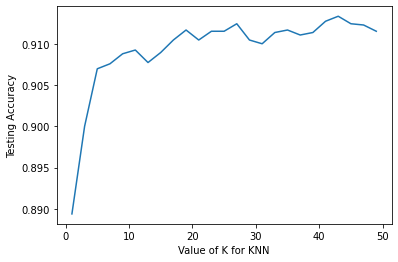

In [33]:
plt.plot(k, acc)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

In [34]:
scaler = StandardScaler()
X_train_sc = scaler.fit(X_train)
print(scaler.mean_)
X_test_sc = scaler.transform(X_test)
cv_X_train_sc = scaler.transform(cv_X_train)
cv_X_test_sc = scaler.transform(cv_X_test)

[ 3.99667982e+01  3.72482549e+00  1.17353566e+00  3.75289833e+00
  2.07465857e-01  1.07162367e+00  3.25341426e-01  3.64582701e-01
  4.22658574e+00  2.00701062e+00  2.57513748e+02  2.56267071e+00
  9.62475053e+02  1.71350531e-01  9.31138088e-01  8.24643399e-02
  9.35762578e+01 -4.05067709e+01  3.62205575e+00  5.16705259e+03]


In [35]:
scaler1 = StandardScaler()
X_train_sc_1 = scaler1.fit(X_train_1)
print(scaler.mean_)
X_test_sc_1 = scaler1.transform(X_test_1)
cv_X_train_sc_1 = scaler1.transform(cv_X_train_1)
cv_X_test_sc_1 = scaler1.transform(cv_X_test_1)

[ 3.99667982e+01  3.72482549e+00  1.17353566e+00  3.75289833e+00
  2.07465857e-01  1.07162367e+00  3.25341426e-01  3.64582701e-01
  4.22658574e+00  2.00701062e+00  2.57513748e+02  2.56267071e+00
  9.62475053e+02  1.71350531e-01  9.31138088e-01  8.24643399e-02
  9.35762578e+01 -4.05067709e+01  3.62205575e+00  5.16705259e+03]


3


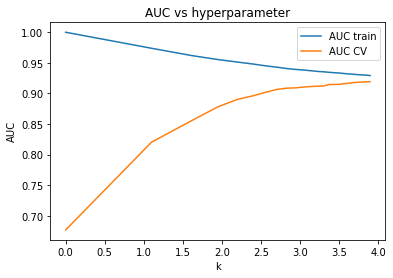

In [36]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score
import math
k = list(range(1,50,2))
train_auc = []
cv_auc = []
acc = []

for i in k:
  #print(i)
  k_nn = KNeighborsClassifier(n_neighbors = i,algorithm='brute',metric = 'euclidean')
  k_nn.fit(cv_X_train_sc,cv_y_train)
  #prediction = k_nn.predict(X_test)
  #cv1 = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
  #scores = cross_val_score(k_nn, X_train, y_train, cv=cv1)
  #print ('Cross validation', scores)
  #print(classification_report(y_test,prediction))
  prob_cv = k_nn.predict_proba(cv_X_test_sc)[:,1]
  cv_auc.append(roc_auc_score(cv_y_test,prob_cv))
  prob_train = k_nn.predict_proba(cv_X_train_sc)[:,1]
  train_auc.append(roc_auc_score(cv_y_train,prob_train))
  score_1 = k_nn.score(cv_X_test_sc, cv_y_test)
  acc.append(score_1)

optimal_k = k[cv_auc.index(max(cv_auc))]
k_1 = [math.log(x) for x in k]
value = int(np.argmax(acc))
print(value)

#plot auc vs alpha
x = plt.subplot( )
x.plot(k_1, train_auc, label='AUC train')
x.plot(k_1, cv_auc, label='AUC CV')
plt.title('AUC vs hyperparameter')
plt.xlabel('k')
plt.ylabel('AUC')
x.legend()
plt.show()

In [37]:
for j in range(len(acc)):
  print(j,acc[j])
print(k[value])

0 0.8813353566009104
1 0.8995447647951441
2 0.9042488619119878
3 0.908649468892261
4 0.9072837632776934
5 0.9042488619119878
6 0.9039453717754173
7 0.903793626707132
8 0.9057663125948406
9 0.906980273141123
10 0.9062215477996965
11 0.9051593323216995
12 0.9042488619119878
13 0.9063732928679817
14 0.9059180576631259
15 0.9056145675265553
16 0.9072837632776934
17 0.9062215477996965
18 0.9074355083459787
19 0.9081942336874052
20 0.9071320182094081
21 0.9081942336874052
22 0.9068285280728376
23 0.9066767830045523
24 0.9068285280728376
7


In [38]:
k_nn = KNeighborsClassifier(n_neighbors = k[value],algorithm='brute',metric = 'euclidean')
k_nn.fit(cv_X_train_sc,cv_y_train)
pred_test = k_nn.predict(X_test_sc)
print(classification_report(y_test,pred_test))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      7319
           1       0.64      0.41      0.50       919

    accuracy                           0.91      8238
   macro avg       0.79      0.69      0.72      8238
weighted avg       0.90      0.91      0.90      8238



Text(0, 0.5, 'Testing Accuracy')

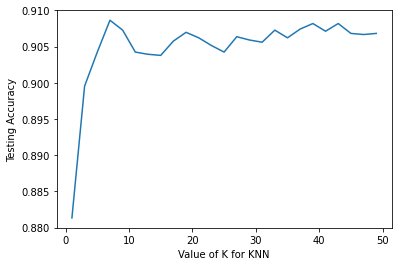

In [39]:
plt.plot(k, acc)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

22


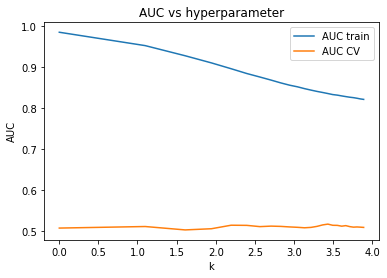

In [40]:
k = list(range(1,50,2))
train_auc = []
cv_auc = []
acc = []

for i in k:
  #print(i)
  k_nn = KNeighborsClassifier(n_neighbors = i,algorithm='brute',metric='euclidean')
  k_nn.fit(cv_X_train_sc_1,cv_y_train_1)
  #prediction = k_nn.predict(X_test)
  #cv1 = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
  #scores = cross_val_score(k_nn, X_train, y_train, cv=cv1)
  #print ('Cross validation', scores)
  #print(classification_report(y_test,prediction))
  prob_cv = k_nn.predict_proba(cv_X_test_sc_1)[:,1]
  cv_auc.append(roc_auc_score(cv_y_test_1,prob_cv))
  prob_train = k_nn.predict_proba(cv_X_train_sc_1)[:,1]
  train_auc.append(roc_auc_score(cv_y_train_1,prob_train))
  score_1 = k_nn.score(cv_X_test_sc_1, cv_y_test_1)
  acc.append(score_1)
optimal_k = k[cv_auc.index(max(cv_auc))]
k_1 = [math.log(x) for x in k]
value = int(np.argmax(acc))
print(value)

#plot auc vs alpha
x = plt.subplot( )
x.plot(k_1, train_auc, label='AUC train')
x.plot(k_1, cv_auc, label='AUC CV')
plt.title('AUC vs hyperparameter')
plt.xlabel('k')
plt.ylabel('AUC')
x.legend()
plt.show()


In [41]:
for j in range(len(acc)):
  print(j,acc[j])
print(k[value])

0 0.8078907435508346
1 0.8399089529590288
2 0.8515933232169954
3 0.8535660091047041
4 0.857814871016692
5 0.8576631259484067
6 0.8593323216995448
7 0.8611532625189682
8 0.8617602427921093
9 0.8625189681335357
10 0.8635811836115326
11 0.8641881638846738
12 0.8640364188163885
13 0.864339908952959
14 0.8646433990895296
15 0.8649468892261002
16 0.8655538694992413
17 0.8660091047040971
18 0.8667678300455235
19 0.866464339908953
20 0.8670713201820941
21 0.8670713201820941
22 0.8678300455235205
23 0.8676783004552352
24 0.8676783004552352
45


In [42]:
k_nn = KNeighborsClassifier(n_neighbors = k[value],algorithm='brute',metric = 'euclidean')
k_nn.fit(cv_X_train_sc_1,cv_y_train_1)
pred_test = k_nn.predict(X_test_sc_1)
print(classification_report(y_test_1,pred_test))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95      7319
           1       0.66      0.20      0.31       919

    accuracy                           0.90      8238
   macro avg       0.79      0.59      0.63      8238
weighted avg       0.88      0.90      0.87      8238



Text(0, 0.5, 'Testing Accuracy')

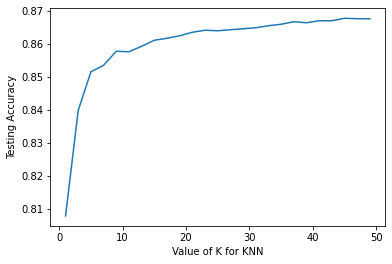

In [43]:
plt.plot(k, acc)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

24


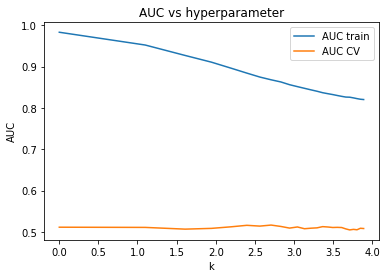

In [44]:
#K-NN-all atributes-brute force - cosine
k = list(range(1,50,2))
train_auc = []
cv_auc = []
acc = []

for i in k:
  #print(i)
  k_nn = KNeighborsClassifier(n_neighbors = i,algorithm='brute',metric = 'cosine')
  k_nn.fit(cv_X_train_sc_1,cv_y_train_1)
  #prediction = k_nn.predict(X_test)
  #cv1 = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
  #scores = cross_val_score(k_nn, X_train, y_train, cv=cv1)
  #print ('Cross validation', scores)
  #print(classification_report(y_test,prediction))
  prob_cv = k_nn.predict_proba(cv_X_test_sc_1)[:,1]
  cv_auc.append(roc_auc_score(cv_y_test_1,prob_cv))
  prob_train = k_nn.predict_proba(cv_X_train_sc_1)[:,1]
  train_auc.append(roc_auc_score(cv_y_train_1,prob_train))
  score_1 = k_nn.score(cv_X_test_sc_1, cv_y_test_1)
  acc.append(score_1)
optimal_k = k[cv_auc.index(max(cv_auc))]
k_1 = [math.log(x) for x in k]
value = int(np.argmax(acc))
print(value)


#plot auc vs alpha
x = plt.subplot( )
x.plot(k_1, train_auc, label='AUC train')
x.plot(k_1, cv_auc, label='AUC CV')
plt.title('AUC vs hyperparameter')
plt.xlabel('k')
plt.ylabel('AUC')
x.legend()
plt.show()

In [45]:
for j in range(len(acc)):
  print(j,acc[j])
print(k[value])

0 0.8072837632776935
1 0.8391502276176024
2 0.8499241274658573
3 0.8538694992412746
4 0.8562974203338392
5 0.8599393019726859
6 0.860546282245827
7 0.8622154779969651
8 0.8622154779969651
9 0.8625189681335357
10 0.8638846737481032
11 0.8632776934749621
12 0.8628224582701062
13 0.8631259484066768
14 0.8638846737481032
15 0.8650986342943854
16 0.8649468892261002
17 0.865402124430956
18 0.8650986342943854
19 0.8660091047040971
20 0.8661608497723824
21 0.8658573596358118
22 0.8655538694992413
23 0.8663125948406677
24 0.8667678300455235
49


In [46]:
k_nn = KNeighborsClassifier(n_neighbors = k[value],algorithm='brute',metric = 'cosine')
k_nn.fit(cv_X_train_sc_1,cv_y_train_1)
pred_test = k_nn.predict(X_test_sc_1)
print(classification_report(y_test_1,pred_test))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95      7319
           1       0.67      0.20      0.30       919

    accuracy                           0.90      8238
   macro avg       0.79      0.59      0.63      8238
weighted avg       0.88      0.90      0.87      8238



Text(0, 0.5, 'Testing Accuracy')

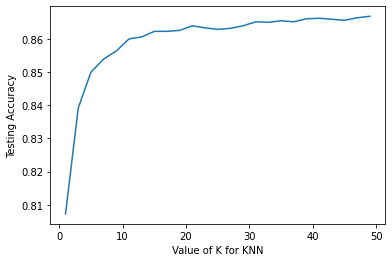

In [47]:
plt.plot(k, acc)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

4


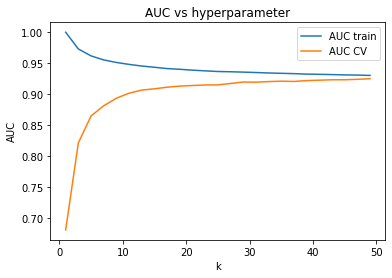

In [48]:
#K-NN-reduced atributes-brute force - cosine
k = list(range(1,50,2))
train_auc = []
cv_auc = []
acc = []

for i in k:
  #print(i)
  k_nn = KNeighborsClassifier(n_neighbors = i,algorithm='brute',metric = 'cosine')
  k_nn.fit(cv_X_train_sc,cv_y_train)
  #prediction = k_nn.predict(X_test)
  #cv1 = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
  #scores = cross_val_score(k_nn, X_train, y_train, cv=cv1)
  #print ('Cross validation', scores)
  #print(classification_report(y_test,prediction))
  prob_cv = k_nn.predict_proba(cv_X_test_sc)[:,1]
  cv_auc.append(roc_auc_score(cv_y_test,prob_cv))
  prob_train = k_nn.predict_proba(cv_X_train_sc)[:,1]
  train_auc.append(roc_auc_score(cv_y_train,prob_train))
  score_1 = k_nn.score(cv_X_test_sc, cv_y_test)
  acc.append(score_1)
optimal_k = k[cv_auc.index(max(cv_auc))]
k_1 = [math.log(x) for x in k]
value = int(np.argmax(acc))
print(value)

#plot auc vs alpha
x = plt.subplot( )
x.plot(k, train_auc, label='AUC train')
x.plot(k, cv_auc, label='AUC CV')
plt.title('AUC vs hyperparameter')
plt.xlabel('k')
plt.ylabel('AUC')
x.legend()
plt.show()

In [49]:
for j in range(len(acc)):
  print(j,acc[j])
print(k[value])

0 0.8813353566009104
1 0.8986342943854325
2 0.9042488619119878
3 0.9084977238239758
4 0.9095599393019727
5 0.9063732928679817
6 0.9062215477996965
7 0.9084977238239758
8 0.9083459787556905
9 0.9088012139605463
10 0.9077389984825494
11 0.907587253414264
12 0.9077389984825494
13 0.9081942336874052
14 0.9080424886191198
15 0.9074355083459787
16 0.906980273141123
17 0.9071320182094081
18 0.907587253414264
19 0.9077389984825494
20 0.9077389984825494
21 0.9072837632776934
22 0.9083459787556905
23 0.9080424886191198
24 0.9081942336874052
9


In [50]:
k_nn = KNeighborsClassifier(n_neighbors = k[value],algorithm='brute',metric = 'cosine')
k_nn.fit(cv_X_train_sc,cv_y_train)
pred_test = k_nn.predict(X_test_sc)
print(classification_report(y_test,pred_test))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      7319
           1       0.64      0.40      0.50       919

    accuracy                           0.91      8238
   macro avg       0.79      0.69      0.72      8238
weighted avg       0.90      0.91      0.90      8238



Text(0, 0.5, 'Testing Accuracy')

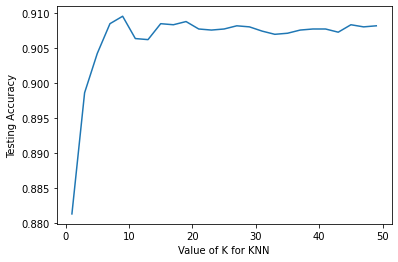

In [51]:
plt.plot(k, acc)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklea

7


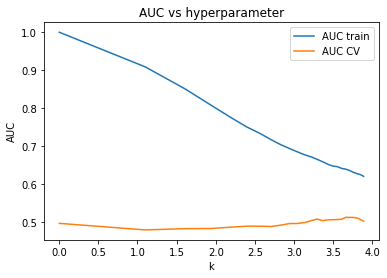

In [52]:
#K-NN - All attributes - brute force - euclidean 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score
import math
k = list(range(1,50,2))
train_auc = []
cv_auc = []
acc = []

for i in k:
  #print(i)
  k_nn = KNeighborsClassifier(n_neighbors = i,algorithm='brute',metric = 'euclidean')
  k_nn.fit(cv_X_train1_ohe,cv_y_train)
  #prediction = k_nn.predict(X_test1_ohe)
  #cv1 = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
  #scores = cross_val_score(k_nn, X_train1_ohe, y_train, cv=cv1)
  #print ('Cross validation', scores)
  #print(classification_report(y_test,prediction))
  prob_cv = k_nn.predict_proba(cv_X_test1_ohe)[:,1]
  cv_auc.append(roc_auc_score(cv_y_test,prob_cv))
  prob_train = k_nn.predict_proba(cv_X_train1_ohe)[:,1]
  train_auc.append(roc_auc_score(cv_y_train,prob_train))
  score_1 = k_nn.score(cv_X_test1_ohe, cv_y_test)
  acc.append(score_1)

optimal_k = k[cv_auc.index(max(cv_auc))]
k_1 = [math.log(x) for x in k]
value = int(np.argmax(acc))
print(value)

#plot auc vs alpha
x = plt.subplot( )
x.plot(k_1, train_auc, label='AUC train')
x.plot(k_1, cv_auc, label='AUC CV')
plt.title('AUC vs hyperparameter')
plt.xlabel('k')
plt.ylabel('AUC')
x.legend()
plt.show()

In [53]:
for j in range(len(acc)):
  print(j,acc[j])
print(k[value])

0 0.7957511380880121
1 0.8585735963581184
2 0.8786039453717754
3 0.8843702579666161
4 0.8871016691957512
5 0.8874051593323217
6 0.8878603945371776
7 0.8880121396054628
8 0.8880121396054628
9 0.8880121396054628
10 0.8880121396054628
11 0.8880121396054628
12 0.8880121396054628
13 0.8880121396054628
14 0.8880121396054628
15 0.8880121396054628
16 0.8880121396054628
17 0.8880121396054628
18 0.8880121396054628
19 0.8880121396054628
20 0.8880121396054628
21 0.8880121396054628
22 0.8880121396054628
23 0.8880121396054628
24 0.8880121396054628
15


In [54]:
k_nn = KNeighborsClassifier(n_neighbors = k[value],algorithm='brute',metric = 'euclidean')
k_nn.fit(cv_X_train,cv_y_train)
pred_test = k_nn.predict(X_test)
print(classification_report(y_test,pred_test))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95      7319
           1       0.65      0.54      0.59       919

    accuracy                           0.92      8238
   macro avg       0.80      0.75      0.77      8238
weighted avg       0.91      0.92      0.91      8238



Text(0, 0.5, 'Testing Accuracy')

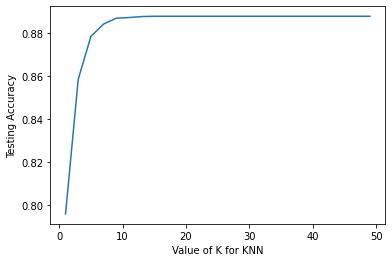

In [55]:
plt.plot(k, acc)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

10


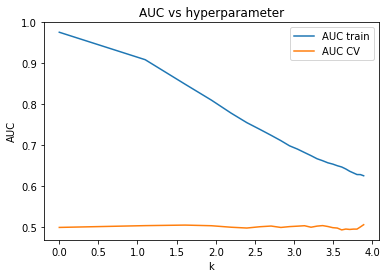

In [56]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
#K-NN - All attributes - brute force - euclidean 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score
import math
k = list(range(1,50,2))
train_auc = []
cv_auc = []
acc = []

for i in k:
  #print(i)
  k_nn = KNeighborsClassifier(n_neighbors = i,algorithm='brute',metric = 'euclidean')
  k_nn.fit(cv_X_train1_1_ohe,cv_y_train)
  #prediction = k_nn.predict(X_test1_1_ohe)
  #cv1 = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
  #scores = cross_val_score(k_nn, X_train1_1_ohe, y_train, cv=cv1)
  #print ('Cross validation', scores)
  #print(classification_report(y_test,prediction))
  prob_cv = k_nn.predict_proba(cv_X_test1_1_ohe)[:,1]
  cv_auc.append(roc_auc_score(cv_y_test,prob_cv))
  prob_train = k_nn.predict_proba(cv_X_train1_1_ohe)[:,1]
  train_auc.append(roc_auc_score(cv_y_train,prob_train))
  score_1 = k_nn.score(cv_X_test1_1_ohe, cv_y_test)
  acc.append(score_1)

optimal_k = k[cv_auc.index(max(cv_auc))]
k_1 = [math.log(x) for x in k]
value = int(np.argmax(acc))
print(value)

#plot auc vs alpha
x = plt.subplot( )
x.plot(k_1, train_auc, label='AUC train')
x.plot(k_1, cv_auc, label='AUC CV')
plt.title('AUC vs hyperparameter')
plt.xlabel('k')
plt.ylabel('AUC')
x.legend()
plt.show()

In [57]:
for j in range(len(acc)):
  print(j,acc[j])
print(k[value])

0 0.7986342943854324
1 0.8606980273141123
2 0.8786039453717754
3 0.884825493171472
4 0.8863429438543248
5 0.887556904400607
6 0.887556904400607
7 0.8878603945371776
8 0.8878603945371776
9 0.8878603945371776
10 0.8880121396054628
11 0.8880121396054628
12 0.8880121396054628
13 0.8880121396054628
14 0.8880121396054628
15 0.8880121396054628
16 0.8880121396054628
17 0.8880121396054628
18 0.8880121396054628
19 0.8880121396054628
20 0.8880121396054628
21 0.8880121396054628
22 0.8880121396054628
23 0.8880121396054628
24 0.8880121396054628
21


In [58]:
k_nn = KNeighborsClassifier(n_neighbors = k[value],algorithm='brute',metric = 'euclidean')
k_nn.fit(cv_X_train_1,cv_y_train)
pred_test = k_nn.predict(X_test_1)
print(classification_report(y_test,pred_test))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94      7319
           1       0.00      0.00      0.00       919

    accuracy                           0.89      8238
   macro avg       0.44      0.50      0.47      8238
weighted avg       0.79      0.89      0.84      8238



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Text(0, 0.5, 'Testing Accuracy')

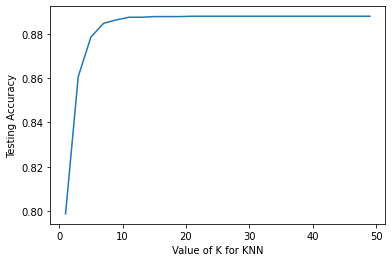

In [59]:
plt.plot(k, acc)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

10


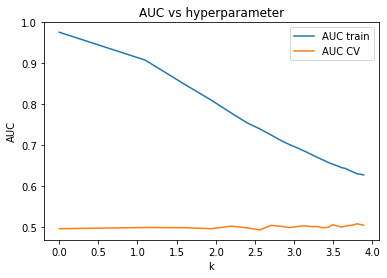

In [60]:
#K-NN - All attributes - brute force - cosine
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score
import math
k = list(range(1,50,2))
train_auc = []
cv_auc = []
acc = []

for i in k:
  #print(i)
  k_nn = KNeighborsClassifier(n_neighbors = i,algorithm='brute',metric = 'cosine')
  k_nn.fit(cv_X_train1_1_ohe,cv_y_train)
  #prediction = k_nn.predict(X_test1_1_ohe)
  #cv1 = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
  #scores = cross_val_score(k_nn, X_train1_1_ohe, y_train, cv=cv1)
  #print ('Cross validation', scores)
  #print(classification_report(y_test,prediction))
  prob_cv = k_nn.predict_proba(cv_X_test1_1_ohe)[:,1]
  cv_auc.append(roc_auc_score(cv_y_test,prob_cv))
  prob_train = k_nn.predict_proba(cv_X_train1_1_ohe)[:,1]
  train_auc.append(roc_auc_score(cv_y_train,prob_train))
  score_1 = k_nn.score(cv_X_test1_1_ohe, cv_y_test)
  acc.append(score_1)

optimal_k = k[cv_auc.index(max(cv_auc))]
k_1 = [math.log(x) for x in k]
value = int(np.argmax(acc))
print(value)

#plot auc vs alpha
x = plt.subplot( )
x.plot(k_1, train_auc, label='AUC train')
x.plot(k_1, cv_auc, label='AUC CV')
plt.title('AUC vs hyperparameter')
plt.xlabel('k')
plt.ylabel('AUC')
x.legend()
plt.show()

In [61]:
for j in range(len(acc)):
  print(j,acc[j])
print(k[value])

0 0.7942336874051593
1 0.8576631259484067
2 0.8784522003034901
3 0.8836115326251897
4 0.8863429438543248
5 0.8872534142640364
6 0.8874051593323217
7 0.8878603945371776
8 0.8878603945371776
9 0.8878603945371776
10 0.8880121396054628
11 0.8880121396054628
12 0.8880121396054628
13 0.8880121396054628
14 0.8880121396054628
15 0.8880121396054628
16 0.8880121396054628
17 0.8880121396054628
18 0.8880121396054628
19 0.8880121396054628
20 0.8880121396054628
21 0.8880121396054628
22 0.8880121396054628
23 0.8880121396054628
24 0.8880121396054628
21


In [62]:
k_nn = KNeighborsClassifier(n_neighbors = k[value],algorithm='brute',metric = 'cosine')
k_nn.fit(cv_X_train_1,cv_y_train)
pred_test = k_nn.predict(X_test_1)
print(classification_report(y_test,pred_test))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94      7319
           1       0.00      0.00      0.00       919

    accuracy                           0.89      8238
   macro avg       0.44      0.50      0.47      8238
weighted avg       0.79      0.89      0.84      8238



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Text(0, 0.5, 'Testing Accuracy')

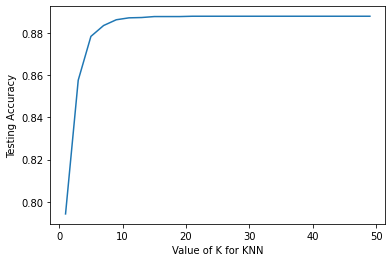

In [63]:
plt.plot(k, acc)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

9


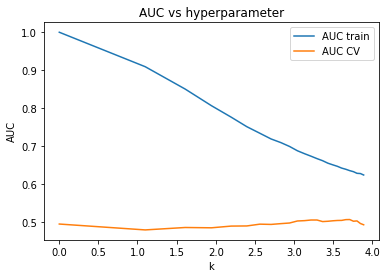

In [64]:
#K-NN - All attributes - brute force - cosine
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score
import math
k = list(range(1,50,2))
train_auc = []
cv_auc = []
acc = []

for i in k:
  #print(i)
  k_nn = KNeighborsClassifier(n_neighbors = i,algorithm='brute',metric = 'cosine')
  k_nn.fit(cv_X_train1_ohe,cv_y_train)
  #prediction = k_nn.predict(X_test1_ohe)
  #cv1 = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
  #scores = cross_val_score(k_nn, X_train1_ohe, y_train, cv=cv1)
  #print ('Cross validation', scores)
  #print(classification_report(y_test,prediction))
  prob_cv = k_nn.predict_proba(cv_X_test1_ohe)[:,1]
  cv_auc.append(roc_auc_score(cv_y_test,prob_cv))
  prob_train = k_nn.predict_proba(cv_X_train1_ohe)[:,1]
  train_auc.append(roc_auc_score(cv_y_train,prob_train))
  score_1 = k_nn.score(cv_X_test1_ohe, cv_y_test)
  acc.append(score_1)

optimal_k = k[cv_auc.index(max(cv_auc))]
k_1 = [math.log(x) for x in k]
value = int(np.argmax(acc))
print(value)

#plot auc vs alpha
x = plt.subplot( )
x.plot(k_1, train_auc, label='AUC train')
x.plot(k_1, cv_auc, label='AUC CV')
plt.title('AUC vs hyperparameter')
plt.xlabel('k')
plt.ylabel('AUC')
x.legend()
plt.show()

In [65]:
for j in range(len(acc)):
  print(j,acc[j])
print(k[value])

0 0.7945371775417299
1 0.8572078907435509
2 0.8790591805766312
3 0.8846737481031867
4 0.8872534142640364
5 0.8878603945371776
6 0.8878603945371776
7 0.8878603945371776
8 0.8878603945371776
9 0.8880121396054628
10 0.8880121396054628
11 0.8880121396054628
12 0.8880121396054628
13 0.8880121396054628
14 0.8880121396054628
15 0.8880121396054628
16 0.8880121396054628
17 0.8880121396054628
18 0.8880121396054628
19 0.8880121396054628
20 0.8880121396054628
21 0.8880121396054628
22 0.8880121396054628
23 0.8880121396054628
24 0.8880121396054628
19


In [66]:
k_nn = KNeighborsClassifier(n_neighbors = k[value],algorithm='brute',metric = 'cosine')
k_nn.fit(cv_X_train,cv_y_train)
pred_test = k_nn.predict(X_test)
print(classification_report(y_test,pred_test))

              precision    recall  f1-score   support

           0       0.94      0.97      0.95      7319
           1       0.65      0.50      0.57       919

    accuracy                           0.91      8238
   macro avg       0.79      0.73      0.76      8238
weighted avg       0.91      0.91      0.91      8238



Text(0, 0.5, 'Testing Accuracy')

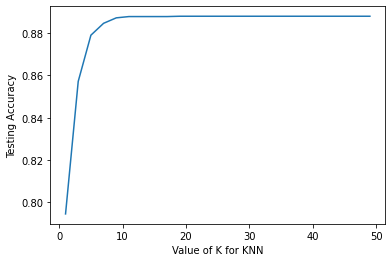

In [67]:
plt.plot(k, acc)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

In [68]:
from sklearn.ensemble import RandomForestClassifier
classifiers_list = {
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Naive Bayes : BernoulliNB": BernoulliNB()
}

classifiers_count = len(classifiers_list.keys())
df_results = pd.DataFrame(data=np.zeros(shape=(classifiers_count,5)), columns = ['classifier', 'Recall', 'F1', 'Precision', 'Accuracy'])

for c_name, classifier in classifiers_list.items():
  classifier.fit(cv_X_train1_ohe,cv_y_train)
  prediction = []
  prediction = classifier.predict(X_test1_ohe)
  cv1 = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
  scores = cross_val_score(classifier, cv_X_train1_ohe, cv_y_train, cv=cv1)
  print ('Classifier+OneHotEncoder', c_name)
  print ('Cross validation', scores)
  print(classification_report(y_test,prediction))

  classifier.fit(cv_X_train1_1_ohe,cv_y_train)
  prediction = []
  prediction = classifier.predict(X_test1_1_ohe)
  cv1 = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
  scores = cross_val_score(classifier, cv_X_train1_1_ohe, cv_y_train, cv=cv1)
  print ('Classifier+OneHotEncoder1', c_name)
  print ('Cross validation', scores)
  print(classification_report(y_test,prediction))

  classifier.fit(cv_X_train_1,cv_y_train)
  prediction = []
  prediction = classifier.predict(X_test_1)
  cv1 = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
  scores = cross_val_score(classifier, cv_X_train_1, cv_y_train, cv=cv1)
  print ('Classifier+Label_Encoder1+Scalar', c_name)
  print ('Cross validation', scores)
  print(classification_report(y_test,prediction))

  classifier.fit(cv_X_train,cv_y_train)
  prediction = []
  prediction = classifier.predict(X_test)
  cv1 = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
  scores = cross_val_score(classifier, cv_X_train, cv_y_train, cv=cv1)
  print ('Classifier+Label_Encoder+Scalar', c_name)
  print ('Cross validation', scores)
  print(classification_report(y_test,prediction))

Classifier+OneHotEncoder Decision Tree
Cross validation [0.77560698 0.77826252 0.78774659 0.78509105 0.78547041]
              precision    recall  f1-score   support

           0       0.89      0.87      0.88      7319
           1       0.13      0.15      0.14       919

    accuracy                           0.79      8238
   macro avg       0.51      0.51      0.51      8238
weighted avg       0.81      0.79      0.80      8238

Classifier+OneHotEncoder1 Decision Tree
Cross validation [0.77902124 0.79021244 0.7866085  0.7754173  0.78490137]
              precision    recall  f1-score   support

           0       0.89      0.88      0.88      7319
           1       0.13      0.15      0.14       919

    accuracy                           0.80      8238
   macro avg       0.51      0.51      0.51      8238
weighted avg       0.81      0.80      0.80      8238

Classifier+Label_Encoder1+Scalar Decision Tree
Cross validation [0.77484825 0.78812595 0.78547041 0.78831563 0.78528073

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classifier+OneHotEncoder1 Naive Bayes : BernoulliNB
Cross validation [0.88220789 0.89131259 0.88713961 0.88846737 0.89093323]
              precision    recall  f1-score   support

           0       0.89      1.00      0.94      7319
           1       0.00      0.00      0.00       919

    accuracy                           0.89      8238
   macro avg       0.44      0.50      0.47      8238
weighted avg       0.79      0.89      0.84      8238

Classifier+Label_Encoder1+Scalar Naive Bayes : BernoulliNB
Cross validation [0.88220789 0.89131259 0.88713961 0.88846737 0.89093323]
              precision    recall  f1-score   support

           0       0.89      1.00      0.94      7319
           1       0.00      0.00      0.00       919

    accuracy                           0.89      8238
   macro avg       0.44      0.50      0.47      8238
weighted avg       0.79      0.89      0.84      8238



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classificat

Classifier+Label_Encoder+Scalar Naive Bayes : BernoulliNB
Cross validation [0.8292868  0.8435129  0.83573596 0.83440819 0.83080425]
              precision    recall  f1-score   support

           0       0.90      0.90      0.90      7319
           1       0.24      0.24      0.24       919

    accuracy                           0.83      8238
   macro avg       0.57      0.57      0.57      8238
weighted avg       0.83      0.83      0.83      8238



In [70]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
parameters = [{'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']},{'penalty':['none', 'elasticnet', 'l1', 'l2']},{'C':[0.001, 0.01, 0.1, 1, 10, 100]}]

grid_search = GridSearchCV(estimator =logreg,param_grid = parameters,scoring = 'accuracy',cv = 5,verbose=0)
grid_search1 = GridSearchCV(estimator =logreg,param_grid = parameters,scoring = 'accuracy',cv = 5,verbose=0)
grid_search_1 = GridSearchCV(estimator =logreg,param_grid = parameters,scoring = 'accuracy',cv = 5,verbose=0)
grid_search1_1 = GridSearchCV(estimator =logreg,param_grid = parameters,scoring = 'accuracy',cv = 5,verbose=0)

grid_search.fit(cv_X_train, cv_y_train)

grid_search1.fit(cv_X_train1_ohe, cv_y_train1)

grid_search_1.fit(cv_X_train_1, cv_y_train)

grid_search1_1.fit(cv_X_train1_1_ohe, cv_y_train1)

/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  ConvergenceWarn

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid=[{'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                     'saga']},
                         {'penalty': ['none', 'elasticnet', 'l1', 'l2']},
                         {'C': [0.001, 0.01, 0.1, 1, 10, 100]}],
             scoring='accuracy')

In [71]:
print("Tuned Hyperparameters :", grid_search.best_params_)
print("Accuracy :",grid_search.best_score_)

Tuned Hyperparameters : {'solver': 'newton-cg'}
Accuracy : 0.9085735963581184


In [72]:
print("Tuned Hyperparameters :", grid_search1.best_params_)
print("Accuracy :",grid_search1.best_score_)

Tuned Hyperparameters : {'solver': 'newton-cg'}
Accuracy : 0.9091426403641881


In [73]:
print("Tuned Hyperparameters :", grid_search_1.best_params_)
print("Accuracy :",grid_search_1.best_score_)

Tuned Hyperparameters : {'solver': 'newton-cg'}
Accuracy : 0.886836115326252


In [74]:
print("Tuned Hyperparameters :", grid_search1_1.best_params_)
print("Accuracy :",grid_search1_1.best_score_)

Tuned Hyperparameters : {'solver': 'newton-cg'}
Accuracy : 0.8875569044006071


In [75]:
from sklearn.linear_model import LogisticRegression


classifiers_list = {
    "Logistic_Reg1": LogisticRegression(solver ='newton-cg'),
}

classifiers_count = len(classifiers_list.keys())
df_results = pd.DataFrame(data=np.zeros(shape=(classifiers_count,5)), columns = ['classifier', 'Recall', 'F1', 'Precision', 'Accuracy'])

for c_name, classifier in classifiers_list.items():
  classifier.fit(cv_X_train1_ohe,cv_y_train)
  prediction = []
  prediction = classifier.predict(X_test1_ohe)
  cv1 = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
  scores = cross_val_score(classifier, cv_X_train1_ohe, cv_y_train, cv=cv1)
  print ('Classifier+OneHotEncoder', c_name)
  print ('Cross validation', scores)
  print(classification_report(y_test,prediction))

  classifier.fit(cv_X_train1_1_ohe,cv_y_train)
  prediction = []
  prediction = classifier.predict(X_test1_1_ohe)
  cv1 = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
  scores = cross_val_score(classifier, cv_X_train1_1_ohe, cv_y_train, cv=cv1)
  print ('Classifier+OneHotEncoder1', c_name)
  print ('Cross validation', scores)
  print(classification_report(y_test,prediction))

  classifier.fit(cv_X_train_1,cv_y_train)
  prediction = []
  prediction = classifier.predict(X_test_1)
  cv1 = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
  scores = cross_val_score(classifier, cv_X_train_1, cv_y_train, cv=cv1)
  print ('Classifier+Label_Encoder1+Scalar', c_name)
  print ('Cross validation', scores)
  print(classification_report(y_test,prediction))

  classifier.fit(cv_X_train,cv_y_train)
  prediction = []
  prediction = classifier.predict(X_test)
  cv1 = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
  scores = cross_val_score(classifier, cv_X_train, cv_y_train, cv=cv1)
  print ('Classifier+Label_Encoder+Scalar', c_name)
  print ('Cross validation', scores)
  print(classification_report(y_test,prediction))

/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  ConvergenceWarn

Classifier+OneHotEncoder Logistic_Reg1
Cross validation [0.88220789 0.89131259 0.88713961 0.88846737 0.89093323]
              precision    recall  f1-score   support

           0       0.89      1.00      0.94      7319
           1       0.00      0.00      0.00       919

    accuracy                           0.89      8238
   macro avg       0.44      0.50      0.47      8238
weighted avg       0.79      0.89      0.84      8238



/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

Classifier+OneHotEncoder1 Logistic_Reg1
Cross validation [0.88220789 0.89131259 0.88713961 0.88846737 0.89093323]
              precision    recall  f1-score   support

           0       0.89      1.00      0.94      7319
           1       0.00      0.00      0.00       919

    accuracy                           0.89      8238
   macro avg       0.44      0.50      0.47      8238
weighted avg       0.79      0.89      0.84      8238



/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

Classifier+Label_Encoder1+Scalar Logistic_Reg1
Cross validation [0.88220789 0.89131259 0.88713961 0.88846737 0.89093323]
              precision    recall  f1-score   support

           0       0.89      1.00      0.94      7319
           1       0.00      0.00      0.00       919

    accuracy                           0.89      8238
   macro avg       0.44      0.50      0.47      8238
weighted avg       0.79      0.89      0.84      8238



/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

Classifier+Label_Encoder+Scalar Logistic_Reg1
Cross validation [0.90307284 0.91084977 0.91009105 0.90496965 0.90914264]
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      7319
           1       0.68      0.45      0.54       919

    accuracy                           0.92      8238
   macro avg       0.81      0.71      0.75      8238
weighted avg       0.91      0.92      0.91      8238



/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  ConvergenceWarning,


In [ ]:
dt = DecisionTreeClassifier()
parameters = [{"max_depth" : [None,1,2,3,4,5],'criterion':['gini','entropy'] }]

grid_search = GridSearchCV(estimator =dt,param_grid = parameters,scoring = 'f1_macro',cv = 5,verbose=0)
grid_search1 = GridSearchCV(estimator =dt,param_grid = parameters,scoring = 'f1_macro',cv = 5,verbose=0)
grid_search_1 = GridSearchCV(estimator =dt,param_grid = parameters,scoring = 'f1_macro',cv = 5,verbose=0)
grid_search1_1 = GridSearchCV(estimator =dt,param_grid = parameters,scoring = 'f1_macro',cv = 5,verbose=0)

grid_search.fit(cv_X_train, cv_y_train)

grid_search1.fit(cv_X_train1_ohe, cv_y_train1)

grid_search_1.fit(cv_X_train_1, cv_y_train)

grid_search1_1.fit(cv_X_train1_1_ohe, cv_y_train1)

In [ ]:
print("Tuned Hyperparameters :", grid_search.best_params_)
print("Accuracy :",grid_search.best_score_)
print("Tuned Hyperparameters :", grid_search1.best_params_)
print("Accuracy :",grid_search1.best_score_)
print("Tuned Hyperparameters :", grid_search_1.best_params_)
print("Accuracy :",grid_search_1.best_score_)
print("Tuned Hyperparameters :", grid_search1_1.best_params_)
print("Accuracy :",grid_search1_1.best_score_)

In [ ]:
classifiers_list = {
    "Decision Tree1": DecisionTreeClassifier(criterion ='gini',max_depth = 3),
    "Decision Tree2": DecisionTreeClassifier(criterion ='gini',max_depth = 5),
    "Decision Tree3": DecisionTreeClassifier(criterion ='entropy',max_depth = None),
    "Decision Tree4": DecisionTreeClassifier(criterion ='entropy',max_depth = None)
}

for c_name, classifier in classifiers_list.items():
  classifier.fit(cv_X_train1_ohe,cv_y_train)
  prediction = []
  prediction = classifier.predict(X_test1_ohe)
  cv1 = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
  scores = cross_val_score(classifier, cv_X_train, cv_y_train, cv=cv1)
  scores1 = cross_val_score(classifier, cv_X_train1_ohe, cv_y_train1, cv=cv1)
  scores2 = cross_val_score(classifier, cv_X_train_1, cv_y_train, cv=cv1)
  scores3 = cross_val_score(classifier, cv_X_train1_1_ohe, cv_y_train1, cv=cv1)
  print ('Classifier+OneHotEncoder', c_name)
  print ('Cross validation', scores)
  print ('Cross validation', scores1)
  print ('Cross validation', scores2)
  print ('Cross validation', scores3)
  #print(classification_report(y_test,prediction))
  #classifier.fit(cv_X_train, cv_y_train)
  #classifier.fit(cv_X_train1_ohe, cv_y_train1)
  #classifier.fit(cv_X_train_1, cv_y_train)
  #classifier.fit(cv_X_train1_1_ohe, cv_y_train1)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
dt = RandomForestClassifier()
parameters = [{"max_depth" : [None,1,2,3,4,5],'criterion':['gini','entropy'] }]

grid_search = GridSearchCV(estimator =dt,param_grid = parameters,scoring = 'f1_macro',cv = 5,verbose=0)
grid_search1 = GridSearchCV(estimator =dt,param_grid = parameters,scoring = 'f1_macro',cv = 5,verbose=0)
grid_search_1 = GridSearchCV(estimator =dt,param_grid = parameters,scoring = 'f1_macro',cv = 5,verbose=0)
grid_search1_1 = GridSearchCV(estimator =dt,param_grid = parameters,scoring = 'f1_macro',cv = 5,verbose=0)

grid_search.fit(cv_X_train, cv_y_train)

grid_search1.fit(cv_X_train1_ohe, cv_y_train1)

grid_search_1.fit(cv_X_train_1, cv_y_train)

grid_search1_1.fit(cv_X_train1_1_ohe, cv_y_train1)

In [ ]:
print("Tuned Hyperparameters :", grid_search.best_params_)
print("F1_Macro :",grid_search.best_score_)
print("Tuned Hyperparameters :", grid_search1.best_params_)
print("F1_Macro :",grid_search1.best_score_)
print("Tuned Hyperparameters :", grid_search_1.best_params_)
print("F1_Macro :",grid_search_1.best_score_)
print("Tuned Hyperparameters :", grid_search1_1.best_params_)
print("F1_Macro :",grid_search1_1.best_score_)

In [ ]:
classifiers_list = {
    "Random Forest1": RandomForestClassifier(criterion ='gini',max_depth = 3),
    "Random Forest2": RandomForestClassifier(criterion ='gini',max_depth = 5),
    "Random Forest3": RandomForestClassifier(criterion ='entropy',max_depth = None),
    "Random Forest4": RandomForestClassifier(criterion ='entropy',max_depth = None)
}

for c_name, classifier in classifiers_list.items():
  classifier.fit(cv_X_train1_ohe,cv_y_train)
  prediction = []
  prediction = classifier.predict(X_test1_ohe)
  cv1 = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
  scores = cross_val_score(classifier, cv_X_train, cv_y_train, cv=cv1)
  scores1 = cross_val_score(classifier, cv_X_train1_ohe, cv_y_train1, cv=cv1)
  scores2 = cross_val_score(classifier, cv_X_train_1, cv_y_train, cv=cv1)
  scores3 = cross_val_score(classifier, cv_X_train1_1_ohe, cv_y_train1, cv=cv1)
  print ('Classifier+OneHotEncoder', c_name)
  print ('Cross validation', scores)
  print ('Cross validation', scores1)
  print ('Cross validation', scores2)
  print ('Cross validation', scores3)
  #print(classification_report(y_test,prediction))
  #classifier.fit(cv_X_train, cv_y_train)
  #classifier.fit(cv_X_train1_ohe, cv_y_train1)
  #classifier.fit(cv_X_train_1, cv_y_train)
  #classifier.fit(cv_X_train1_1_ohe, cv_y_train1)

In [ ]:
from sklearn.naive_bayes import BernoulliNB
nb = BernoulliNB()
parameters = [{'alpha':[0.00001, 0.0001, 0.001, 0.1, 1, 10, 100,1000]}]

grid_search = GridSearchCV(estimator =nb,param_grid = parameters,scoring = 'f1_macro',cv = 5,verbose=0)
grid_search1 = GridSearchCV(estimator =nb,param_grid = parameters,scoring = 'f1_macro',cv = 5,verbose=0)
grid_search_1 = GridSearchCV(estimator =nb,param_grid = parameters,scoring = 'f1_macro',cv = 5,verbose=0)
grid_search1_1 = GridSearchCV(estimator =nb,param_grid = parameters,scoring = 'f1_macro',cv = 5,verbose=0)

grid_search.fit(cv_X_train, cv_y_train)

grid_search1.fit(cv_X_train1_ohe, cv_y_train1)

grid_search_1.fit(cv_X_train_1, cv_y_train)

grid_search1_1.fit(cv_X_train1_1_ohe, cv_y_train1)

In [ ]:
print("Tuned Hyperparameters :", grid_search.best_params_)
print("F1_Macro :",grid_search.best_score_)
print("Tuned Hyperparameters :", grid_search1.best_params_)
print("F1_Macro :",grid_search1.best_score_)
print("Tuned Hyperparameters :", grid_search_1.best_params_)
print("F1_Macro :",grid_search_1.best_score_)
print("Tuned Hyperparameters :", grid_search1_1.best_params_)
print("F1_Macro :",grid_search1_1.best_score_)

In [ ]:
classifiers_list = {
    "Naive Bayes - Bernoulli1 ": BernoulliNB(alpha = 1e-05),
    "Naive Bayes - Bernoulli2 ": BernoulliNB(alpha = 1),
    "Naive Bayes - Bernoulli3 ": BernoulliNB(alpha = 1e-05),
    "Naive Bayes - Bernoulli4 ": BernoulliNB(alpha = 100)
}

for c_name, classifier in classifiers_list.items():
  classifier.fit(cv_X_train1_ohe,cv_y_train)
  prediction = []
  prediction = classifier.predict(X_test1_ohe)
  cv1 = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
  scores = cross_val_score(classifier, cv_X_train, cv_y_train, cv=cv1)
  scores1 = cross_val_score(classifier, cv_X_train1_ohe, cv_y_train1, cv=cv1)
  scores2 = cross_val_score(classifier, cv_X_train_1, cv_y_train, cv=cv1)
  scores3 = cross_val_score(classifier, cv_X_train1_1_ohe, cv_y_train1, cv=cv1)
  print ('Classifier+OneHotEncoder', c_name)
  print ('Cross validation', scores)
  print ('Cross validation', scores1)
  print ('Cross validation', scores2)
  print ('Cross validation', scores3)
  #print(classification_report(y_test,prediction))
  #classifier.fit(cv_X_train, cv_y_train)
  #classifier.fit(cv_X_train1_ohe, cv_y_train1)
  #classifier.fit(cv_X_train_1, cv_y_train)
  #classifier.fit(cv_X_train1_1_ohe, cv_y_train1)